In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model

In [56]:
df_fpt = pd.read_csv('FPT.csv', encoding='utf-8', skipinitialspace=True)
df_msn = pd.read_csv('MSN.csv', encoding='utf-8', skipinitialspace=True)
df_pnj = pd.read_csv('PNJ.csv', encoding='utf-8', skipinitialspace=True)
df_vic = pd.read_csv('VIC.csv', encoding='utf-8', skipinitialspace=True)


In [57]:
df_fpt['Date/Time'] = pd.to_datetime(df_fpt['Date/Time'])
df_msn['Date/Time'] = pd.to_datetime(df_msn['Date/Time'])
df_pnj['Date/Time'] = pd.to_datetime(df_pnj['Date/Time'])
df_vic['Date/Time'] = pd.to_datetime(df_vic['Date/Time'])                                    

In [59]:
print(df_fpt.head())
print(df_msn.head())
print(df_pnj.head())
print(df_vic.head())


  Ticker           Date/Time   Open   High    Low  Close  Volume  \
0    FPT 2018-12-25 09:15:00  30.89  30.89  30.89  30.89   35410   
1    FPT 2018-12-25 09:16:00  30.81  30.81  30.81  30.81     190   
2    FPT 2018-12-25 09:17:00  30.74  30.81  30.74  30.74    1120   
3    FPT 2018-12-25 09:18:00  30.74  30.74  30.74  30.74    2120   
4    FPT 2018-12-25 09:19:00  30.74  30.74  30.74  30.74   22500   

   Open Interest  
0              0  
1              0  
2              0  
3              0  
4              0  
  Ticker           Date/Time  Open  High   Low  Close  Volume  Open Interest
0    MSN 2017-12-25 09:15:00  73.1  73.1  73.1   73.1    4210              0
1    MSN 2017-12-25 09:16:00  73.0  73.0  73.0   73.0    5000              0
2    MSN 2017-12-25 09:18:00  73.5  73.5  73.5   73.5     210              0
3    MSN 2017-12-25 09:20:00  73.2  73.5  73.1   73.1    2050              0
4    MSN 2017-12-25 09:21:00  73.0  73.0  73.0   73.0    1380              0
  Ticker       

In [39]:
def prepare_data(df):
    # Chuyển đổi cột 'Date/Time' thành kiểu dữ liệu thời gian và đặt làm index
    df['Date/Time'] = pd.to_datetime(df['Date/Time'])
    df.set_index('Date/Time', inplace=True)

    # Tính phần trăm thay đổi trong cột 'Close' để có 'returns' và nhân với 1000
    df['returns'] = df['Close'].pct_change() * 1000

    # Loại bỏ các giá trị NaN từ cột 'returns'
    df = df.dropna(subset=['returns'])
    
    return df


In [40]:
df_fpt = prepare_data(df_fpt)
df_msn = prepare_data(df_msn)
df_pnj = prepare_data(df_pnj)
df_vic = prepare_data(df_vic)

In [41]:
# Hàm huấn luyện mô hình GARCH
def fit_garch_model(df):
    model = arch_model(df['returns'], vol='Garch', p=1, q=1)
    model_fit = model.fit(disp='off')  # Ẩn kết quả tối ưu hóa
    return model_fit


In [42]:
fpt_model = fit_garch_model(df_fpt)
msn_model = fit_garch_model(df_msn)
pnj_model = fit_garch_model(df_pnj)
vic_model = fit_garch_model(df_vic)

In [43]:
print("FPT Model AIC:", fpt_model.aic, "BIC:", fpt_model.bic)
print("MSN Model AIC:", msn_model.aic, "BIC:", msn_model.bic)
print("PNJ Model AIC:", pnj_model.aic, "BIC:", pnj_model.bic)
print("VIC Model AIC:", vic_model.aic, "BIC:", vic_model.bic)

FPT Model AIC: 318913.5768920661 BIC: 318951.52342335816
MSN Model AIC: 566390.2426595122 BIC: 566429.5052253504
PNJ Model AIC: 775289.388669968 BIC: 775328.3427899105
VIC Model AIC: 361980.16669977526 BIC: 362018.26868426386


In [44]:
fpt_forecast = fpt_model.forecast(horizon=1)
msn_forecast = msn_model.forecast(horizon=1)
pnj_forecast = pnj_model.forecast(horizon=1)
vic_forecast = vic_model.forecast(horizon=1)

In [45]:
print("FPT Forecast:", fpt_forecast.variance.values[-1, :])
print("MSN Forecast:", msn_forecast.variance.values[-1, :])
print("PNJ Forecast:", pnj_forecast.variance.values[-1, :])
print("VIC Forecast:", vic_forecast.variance.values[-1, :])

FPT Forecast: [1.24926661]
MSN Forecast: [1.69184331]
PNJ Forecast: [2.97845391]
VIC Forecast: [0.86556479]


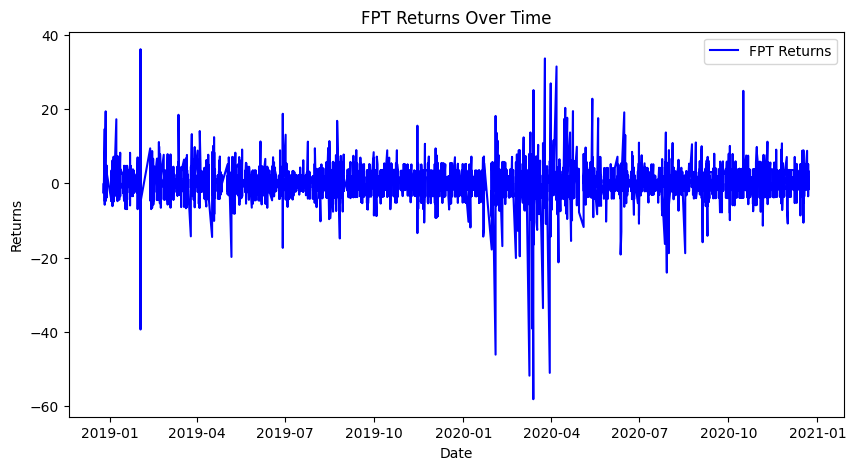

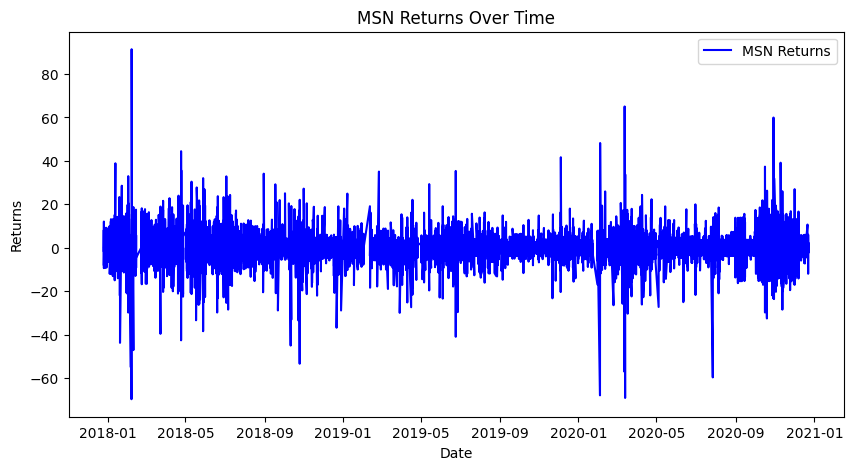

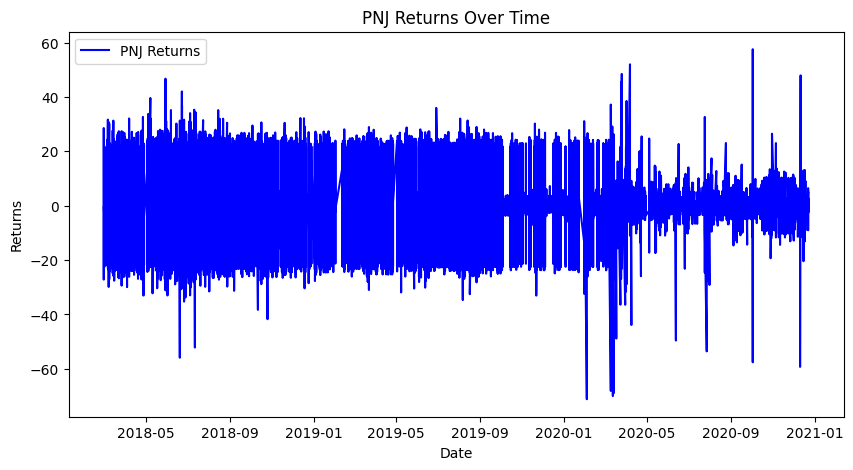

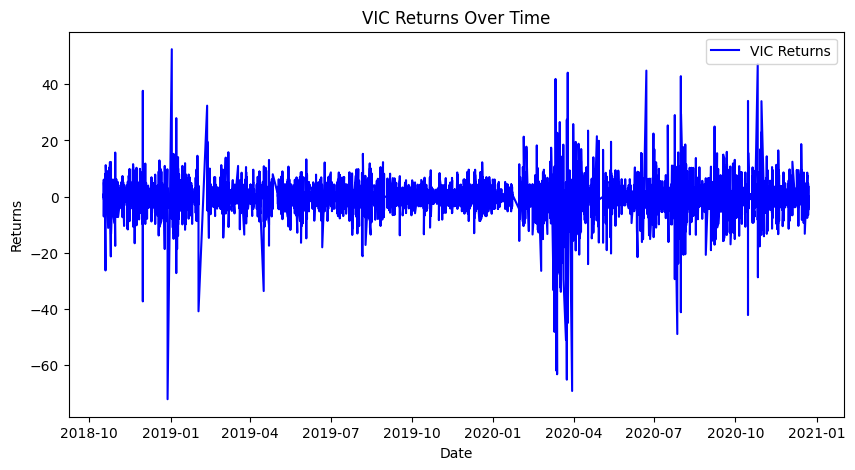

In [46]:
import matplotlib.pyplot as plt

# Hàm vẽ biểu đồ chuỗi thời gian của returns
def plot_returns(df, ticker):
    plt.figure(figsize=(10, 5))
    plt.plot(df['returns'], color='blue', label=f'{ticker} Returns')
    plt.title(f'{ticker} Returns Over Time')
    plt.xlabel('Date')
    plt.ylabel('Returns')
    plt.legend()
    plt.show()

# Vẽ biểu đồ returns cho từng công ty
plot_returns(df_fpt, 'FPT')
plot_returns(df_msn, 'MSN')
plot_returns(df_pnj, 'PNJ')
plot_returns(df_vic, 'VIC')


In [47]:
from arch import arch_model

# Hàm huấn luyện và đánh giá mô hình GARCH, EGARCH
def fit_models(df, ticker):
    models = {
        'GARCH': arch_model(df['returns'], vol='Garch', p=1, q=1),
        'EGARCH': arch_model(df['returns'], vol='EGarch', p=1, q=1)
    }
    
    results = {}
    for name, model in models.items():
        model_fit = model.fit(disp='off')
        results[name] = {
            'model_fit': model_fit,
            'aic': model_fit.aic,
            'bic': model_fit.bic
        }
        print(f"{ticker} {name} Model AIC: {model_fit.aic}, BIC: {model_fit.bic}")
    return results

# Huấn luyện và đánh giá các mô hình cho từng công ty
fpt_results = fit_models(df_fpt, 'FPT')
msn_results = fit_models(df_msn, 'MSN')
pnj_results = fit_models(df_pnj, 'PNJ')
vic_results = fit_models(df_vic, 'VIC')


FPT GARCH Model AIC: 318913.5768920661, BIC: 318951.52342335816
FPT EGARCH Model AIC: 320918.8936541166, BIC: 320956.84018540866
MSN GARCH Model AIC: 566390.2426595122, BIC: 566429.5052253504
MSN EGARCH Model AIC: 574071.2183972726, BIC: 574110.4809631108
PNJ GARCH Model AIC: 775289.388669968, BIC: 775328.3427899105
PNJ EGARCH Model AIC: 792161.1595657038, BIC: 792200.1136856463
VIC GARCH Model AIC: 361980.16669977526, BIC: 362018.26868426386
VIC EGARCH Model AIC: 369875.072723459, BIC: 369913.1747079476


In [95]:
# Hàm chọn mô hình tốt nhất dựa trên AIC, BIC
def select_best_model(results):
    best_model = min(results, key=lambda x: (results[x]['aic'], results[x]['bic']))
    return best_model, results[best_model]['model_fit']

# Chọn mô hình tốt nhất cho từng công ty
best_fpt_model_name, best_fpt_model = select_best_model(fpt_results)
best_msn_model_name, best_msn_model = select_best_model(msn_results)
best_pnj_model_name, best_pnj_model = select_best_model(pnj_results)
best_vic_model_name, best_vic_model = select_best_model(vic_results)

print(f"Best model for FPT: {best_fpt_model_name}")
print(f"Best model for MSN: {best_msn_model_name}")
print(f"Best model for PNJ: {best_pnj_model_name}")
print(f"Best model for VIC: {best_vic_model_name}")


Best model for FPT: GARCH
Best model for MSN: GARCH
Best model for PNJ: GARCH
Best model for VIC: GARCH


In [48]:
# Hàm dự đoán biến động (volatility) từ mô hình GARCH/EGARCH
def predict_volatility(model_fit, df):
    # Tính toán biến động (conditional volatility)
    volatility = model_fit.conditional_volatility
    return volatility

# Dự đoán biến động cho từng công ty sử dụng mô hình tốt nhất
fpt_volatility = predict_volatility(best_fpt_model, df_fpt)
msn_volatility = predict_volatility(best_msn_model, df_msn)
pnj_volatility = predict_volatility(best_pnj_model, df_pnj)
vic_volatility = predict_volatility(best_vic_model, df_vic)

# In ra các thông tin về độ biến động
print("Predicted volatility for FPT:", fpt_volatility[:5])  # In ra 5 giá trị đầu tiên
print("Predicted volatility for MSN:", msn_volatility[:5])
print("Predicted volatility for PNJ:", pnj_volatility[:5])
print("Predicted volatility for VIC:", vic_volatility[:5])


Predicted volatility for FPT: Date/Time
2018-12-25 09:16:00    3.445327
2018-12-25 09:17:00    3.184919
2018-12-25 09:18:00    2.926137
2018-12-25 09:19:00    2.497786
2018-12-25 09:20:00    2.143639
Name: cond_vol, dtype: float64
Predicted volatility for MSN: Date/Time
2017-12-25 09:16:00    2.616593
2017-12-25 09:18:00    2.470991
2017-12-25 09:20:00    3.694923
2017-12-25 09:21:00    4.079139
2017-12-25 09:22:00    3.747054
Name: cond_vol, dtype: float64
Predicted volatility for PNJ: Date/Time
2018-02-28 09:16:00    8.558115
2018-02-28 09:19:00    8.252177
2018-02-28 09:20:00    8.417847
2018-02-28 09:21:00    8.115020
2018-02-28 09:22:00    7.823690
Name: cond_vol, dtype: float64
Predicted volatility for VIC: Date/Time
2018-10-17 09:40:00    1.705097
2018-10-17 09:41:00    1.495012
2018-10-17 09:42:00    1.452000
2018-10-17 09:43:00    1.300424
2018-10-17 09:44:00    1.318085
Name: cond_vol, dtype: float64


In [84]:
min_length = min(len(fpt_volatility), len(msn_volatility), len(pnj_volatility), len(vic_volatility))

fpt_volatility = fpt_volatility[:min_length]
msn_volatility = msn_volatility[:min_length]
pnj_volatility = pnj_volatility[:min_length]
vic_volatility = vic_volatility[:min_length]

data = {
    'Date/Time': fpt_volatility.index,  
    'FPT Volatility': fpt_volatility.values,
    'MSN Volatility': msn_volatility.values,
    'PNJ Volatility': pnj_volatility.values,
    'VIC Volatility': vic_volatility.values
}

df_volatility = pd.DataFrame(data)

# Lưu DataFrame vào một file CSV
df_volatility.to_csv('predicted_volatility.csv', index=False)
